In [1]:
import pandas as pd
import numpy as np

In [2]:
company= pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv")

# Understanding the Data

In [3]:
company.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [9]:
company.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [21]:
company.shape

(148, 6)

In [7]:
company.isna().sum()
#Gender & County does not have any Null Values

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [13]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [14]:
company.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


# Data Preprocessing

In [26]:
#Dropping NA Values from Place & Company as those are categorical Values
company.dropna(subset=['Company'],inplace=True)
company.dropna(subset=['Place'],inplace=True)

In [27]:
#21 Rows got dropped
company.shape

(127, 6)

In [28]:
company.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

# Fill NA Values of Age and Salary with their Mean Values

In [29]:
#Filling Age with Mean Values
company['Age']=company['Age'].fillna(company['Age'].mean())

In [30]:
#Filling Salary with Mean Values
company['Salary']=company['Salary'].fillna(company['Salary'].mean())

In [31]:
#Now it is 0 Null Values
company.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

# Findings

# Below is the Average Age of working person from Each Company

In [61]:
company.groupby(['Company']).agg({'Age':np.mean})

,Age
Company,
CTS,31.878788
Congnizant,21.500000
Infosys,32.609355
Infosys Pvt Lmt,21.500000
TCS,28.438147
Tata Consultancy Services,31.000000


Findings for above - Infosys has the highest Average Age among the listed companies

# Below is the average Salary from Each Company

In [63]:
company.groupby(['Company']).agg({'Salary':np.mean})

,Salary
Company,
CTS,4522.389408
Congnizant,2934.000000
Infosys,5067.931909
Infosys Pvt Lmt,8202.000000
TCS,5297.759793
Tata Consultancy Services,8345.000000


Findings for above - Tata Consultance Services has the Highest average Salary and Cognizant has the lowest

# Finding which company has higher & Lower number of employees

In [70]:
company.groupby(['Company']).count()

,Age,Salary,Place,Country,Gender
Company,,,,,
CTS,33,33,33,33,33
Congnizant,2,2,2,2,2
Infosys,42,42,42,42,42
Infosys Pvt Lmt,2,2,2,2,2
TCS,47,47,47,47,47
Tata Consultancy Services,1,1,1,1,1


TCS has the highest number of employess which is 47 and Tata Consutancy Servies has only 1 employee

# Finding which place has higher & Lower number of working professionals

In [69]:
company.groupby(['Place']).count()

,Company,Age,Salary,Country,Gender
Place,,,,,
Bhopal,1,1,1,1,1
Calcutta,31,31,31,31,31
Chennai,13,13,13,13,13
Cochin,13,13,13,13,13
Delhi,13,13,13,13,13
Hyderabad,7,7,7,7,7
Mumbai,36,36,36,36,36
Nagpur,1,1,1,1,1
Noida,7,7,7,7,7


Mumbai has the higheest number of working professionals which is 36 and Bhopal, Nagpur has just 1 each

# Finding which PLace has highest Average Age and Lowest

In [74]:
company.groupby(['Place']).agg({'Age':np.mean})

,Age
Place,
Bhopal,26.000000
Calcutta,28.404510
Chennai,29.696392
Cochin,29.925119
Delhi,35.923077
Hyderabad,39.930468
Mumbai,29.473697
Nagpur,32.000000
Noida,31.714286


Hyderabad has the highest average Age 39 and Pondicherry has the lowest which is 22 

# Finding Maximum Salary from the list

In [83]:
company['Salary'].max()

9876.0

# Visualization


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
company['Company'].groupby(company['Company']).count()

Company
CTS                          33
Congnizant                    2
Infosys                      42
Infosys Pvt Lmt               2
TCS                          47
Tata Consultancy Services     1
Name: Company, dtype: int64

In [56]:
company['Company']=='TCS'

0       True
1      False
2       True
3      False
4       True
       ...  
143     True
144    False
145    False
146     True
147    False
Name: Company, Length: 127, dtype: bool

# Company Wise Salary projection

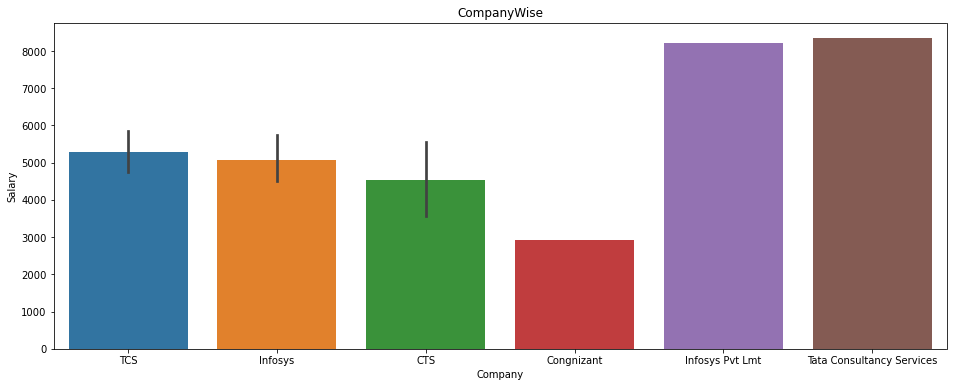

In [98]:
plt.figure(figsize=(16,6))
plt.title("CompanyWise Salary Projection") #Only numeric values can be plotted so compare non-catgegorical values
sns.barplot(x=company['Company'],y=company['Salary'])

Finding from Above is - Tata Consultancy Services has the highest Salary and Cognizant has the lowest Salary

# Place Wise Salary projection

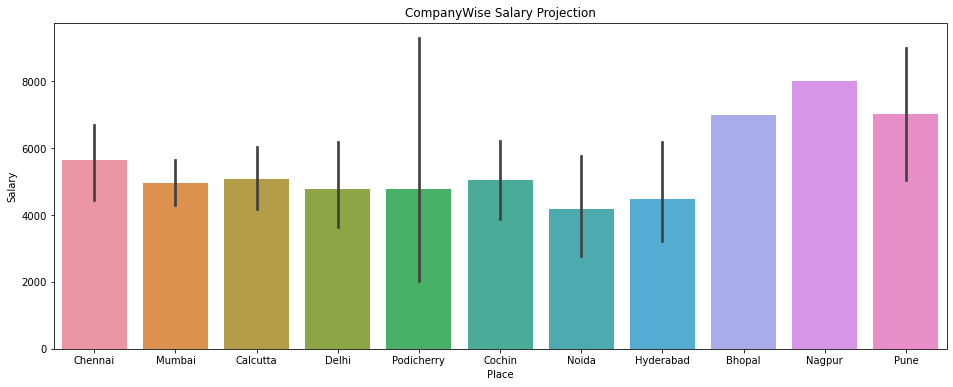

In [99]:
plt.figure(figsize=(16,6))
plt.title("Place Salary Projection") #Only numeric values can be plotted so compare non-catgegorical values
#sns.barplot(x=company['Company'],y=company['Age'])
sns.barplot(x=company['Place'],y=company['Salary'])

Finding from Above - Pondicherry has the highest & lowest Salary 

# PlaceWise Age Projection

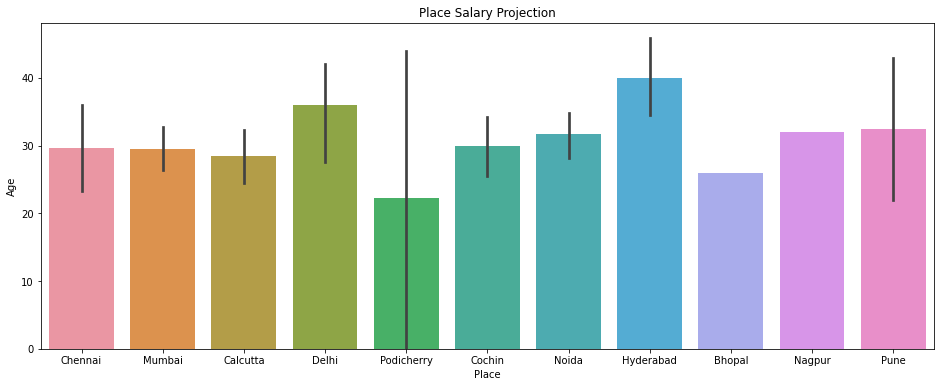

In [102]:
plt.figure(figsize=(16,6))
plt.title("Place Age Projection") #Only numeric values can be plotted so compare non-catgegorical values
#sns.barplot(x=company['Company'],y=company['Age'])
sns.barplot(x=company['Place'],y=company['Age'])

Pondicherry Has the maximum and Minium Age working professionals

# CompanyWise Age Projection

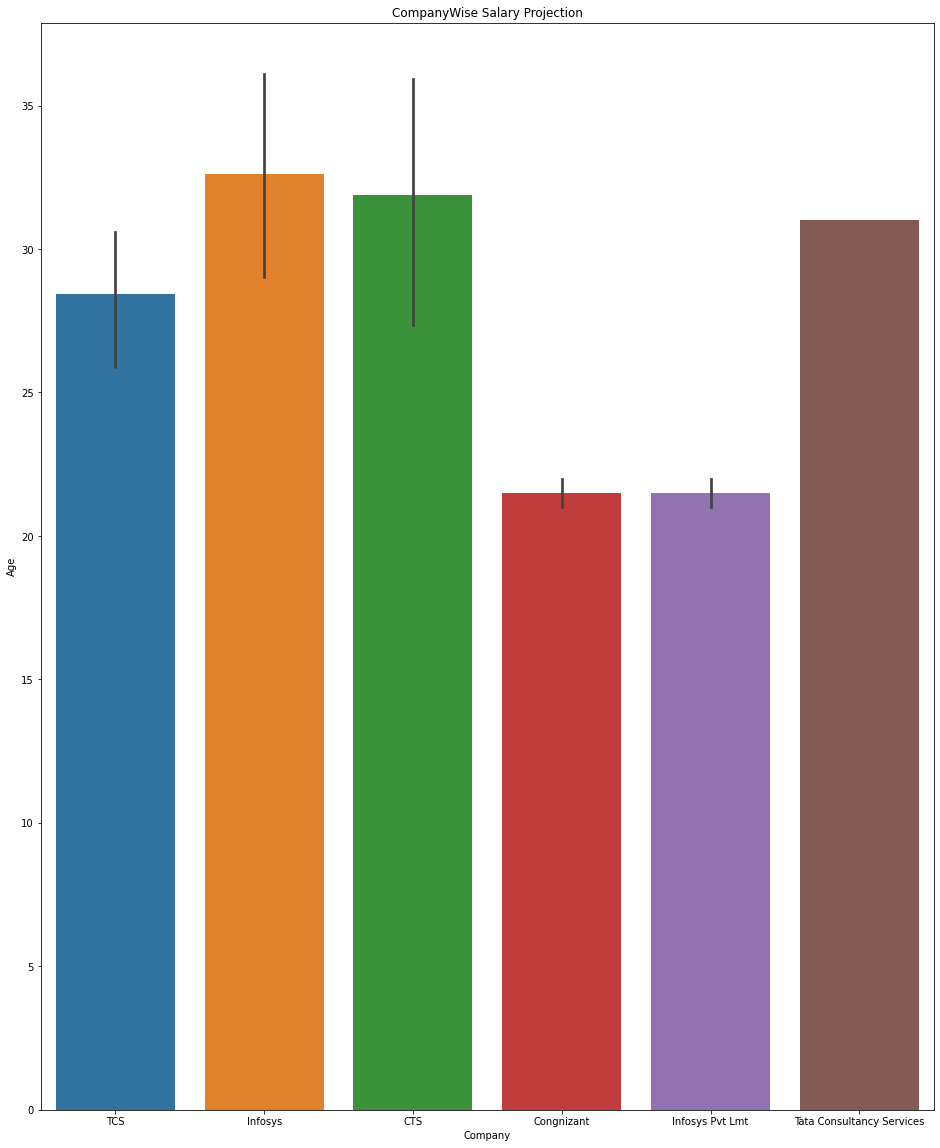

In [110]:
plt.figure(figsize=(16,20))
plt.title("CompanyWise Salary Projection") #Only numeric values can be plotted so compare non-catgegorical values
sns.barplot(x=company['Company'],y=company['Age'])

Infosys has the maximum Age of working professionals